# vecPy Example:

This notebook shows an example of how one can use vecpy in order to load manipulate and display analyzed PIV data. 

### step 1 - import vecpy and necessities

here we import the package code so that we can use it next 

In [1]:
import os, sys 
sys.path.append(os.path.abspath('../'))

import matplotlib.pyplot as plt
%matplotlib inline

from vecPy import Vec
import loadVec
import vecPlot

# for the sake of this tutorial, ignore warnings
import warnings
warnings.filterwarnings('ignore')

### step 2 - load the tests data

In order to load the data, first we need to set up the path to the data directory. Following that we need to get a list of files names that we would like to view/analyze. Finally we very quickly load the data in to a list of vec instances.

In [2]:
# pointer to the directory with the data
path_to_data = os.path.abspath('../tests/data/')

# get a list of files with the proper extention (in this case ".vec"). in our case 3 files are enough.
file_names = sorted(loadVec.read_directory(path_to_data))[:4]

# load the data into the memory so we can start manipulating it
vecs = loadVec.getVecList(path_to_data, fnames = file_names)

# get the correct physical length units of measurements into the data
# (time data is taken from the vec file header) 
for v in vecs:
    v.set_Lunits('mm')

### step 3 - plot some arrows

first things first - show a quiver plot

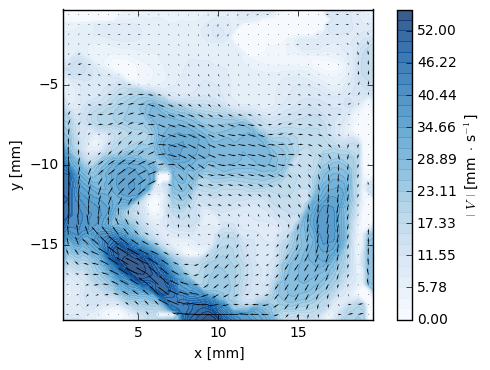

In [11]:
fig, ax = vecPlot.genQuiver(vecs[0], nthArr=2, arrScale=20)

and a vorticity map

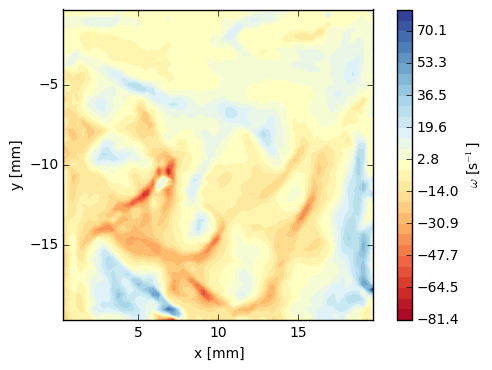

In [4]:
fig, ax = vecPlot.genVorticityMap(vecs[0])

Also, velocity histograms in x and y directions

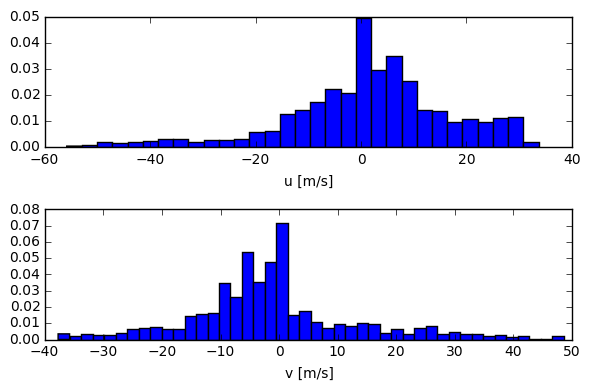

In [5]:
fig, ax1, ax2 = vecPlot.genVelHist(vecs[0], normed = True)

We can also plot a whole list of vec's as subplots:

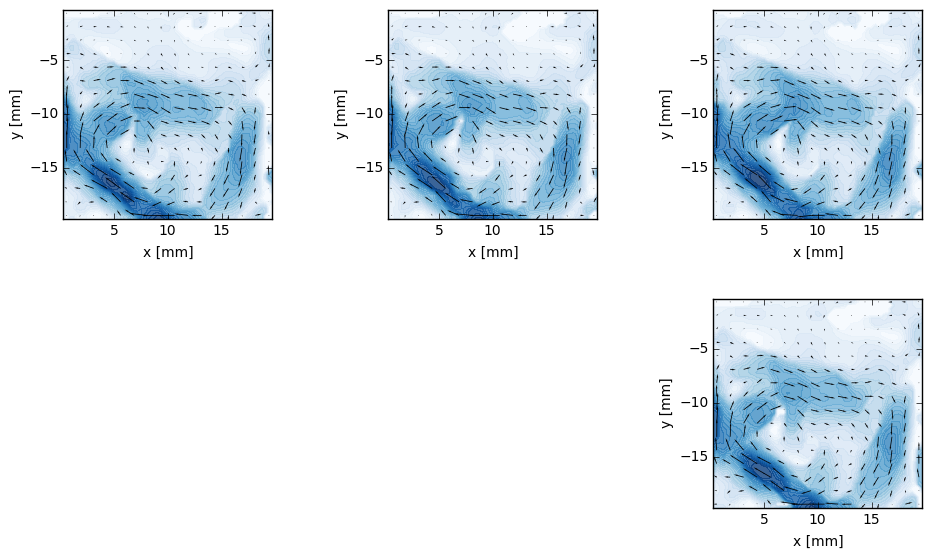

In [6]:
fig, ax = vecPlot.quiverVecList(vecs, nthArr=4, arrScale=10)
fig.set_size_inches(10, 6)

# Last but not least - manipulation

lets create a linear combinatino of our data and then see how to manipulate the coordinate system (note that all of these operation can be made in a bundle on all the data that we load by using the optional inputs for __loadVec.getVecList(..)__ )

__Addition and Scalar multiplication__

(<matplotlib.figure.Figure at 0x7ff6d4fe7090>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff6d4fe7c10>)

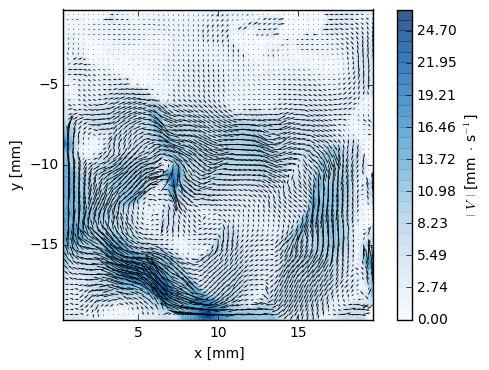

In [7]:
v = (vecs[2] + vecs[1] + vecs[0] - 2 * vecs[3]) / 3
vecPlot.genQuiver(v, arrScale=10)

__Crop__

(<matplotlib.figure.Figure at 0x7ff6d5243b10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff6d4c77e90>)

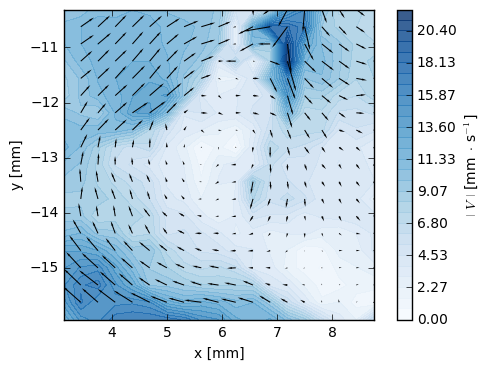

In [8]:
v.crop(3,9,-16,-10)  #(xmin, xmax, ymin, ymax)
vecPlot.genQuiver(v, arrScale=10)

__Rotate__

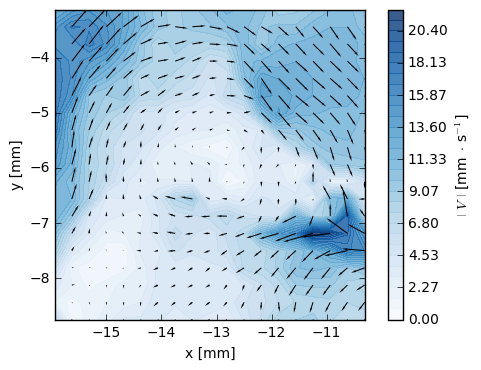

In [9]:
v.rotate(90) # 90 degrees rotation clockwise
fig, ax = vecPlot.genQuiver(v, arrScale=10)

__Translation of Coordinate System__

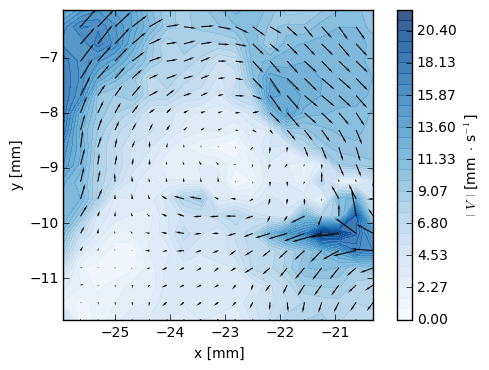

In [10]:
v.move(-10,-3)
fig, ax = vecPlot.genQuiver(v, arrScale=10)